<h1>MLTS Exercise 01 - Data Exploration</h1>

### Task:

This notebook provides three time series datasets, each representing daily user counts for separate applications over the year 2020:
* `App_1_Users_2020.csv`
* `App_2_Users_2020.csv`
* `App_3_Users_2020.csv`

For each dataset, complete the following tasks:

* Load the dataset.
* Visualize the data to observe user trends over time.
* Examine the data for any notable characteristics.
* Split the data into training and test sets, with the test set comprising the final three months of 2020.

In subsequent Exercises 02 and 03, these datasets will be utilized to perform Bayesian Linear Regression analysis.

In [16]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

import os

# Load data sets

In [23]:
# Load the datasets
data_set_path = "../00_Datasets/01-03_App_Datasets/"
# iterate over data_set_path
data_set_names = os.listdir(data_set_path)
data_set_names.sort()

data_sets = []
print(f"Loading datasets: {data_set_names}")
for file in data_set_names:
    df = pd.read_csv(data_set_path + file, sep=';')
    data_sets.append(df)

Loading datasets: ['App_1_Users_2020.csv', 'App_2_Users_2020.csv', 'App_3_Users_2020.csv']


# Visualize data

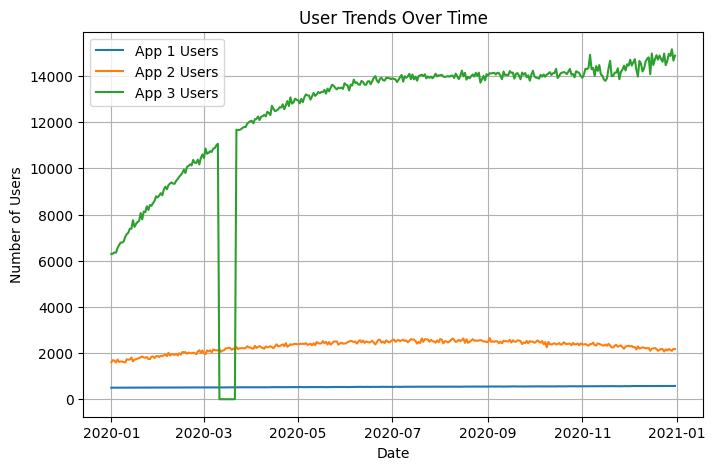

In [24]:
# Convert the 'date' column to datetime format
for df in data_sets:
    df['date'] = pd.to_datetime(df['date'])

# Plot the user trends over time for each dataset
plt.figure(figsize=(8, 5))

for i, df in enumerate(data_sets):
    plt.plot(df['date'], df['users'], label=f'App {i+1} Users')

plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('User Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

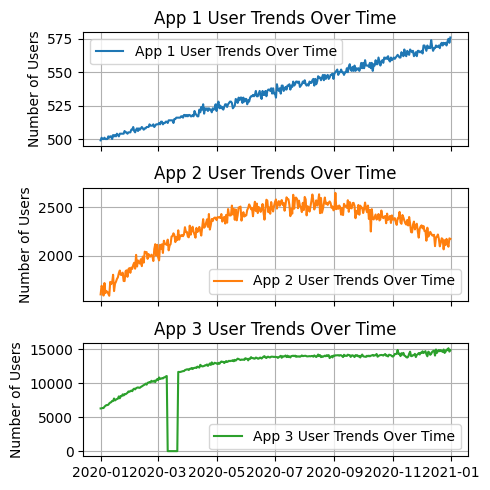

In [27]:
def add_subplot(ax, df, title, color):
    ax.plot(df['date'], df['users'], label=title, color=color)
    ax.set_title(title)
    ax.set_ylabel('Number of Users')
    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(3, 1, figsize=(5, 5), sharex=True)

for i, df in enumerate(data_sets):
    add_subplot(axs[i], df, f'App {i+1} User Trends Over Time', 'C' + str(i))

plt.tight_layout()
plt.show()

In [28]:
def train_test_split(data, split_date: pd.DateOffset):
    latest_date = data['date'].max()
    split_date = latest_date - split_date
    train_data = data[data['date'] <= split_date]
    test_data = data[data['date'] > split_date]

    return train_data, test_data

split_date = pd.DateOffset(months=3)

split_data = []

for df in data_sets:
    split_data.append(train_test_split(df, split_date))


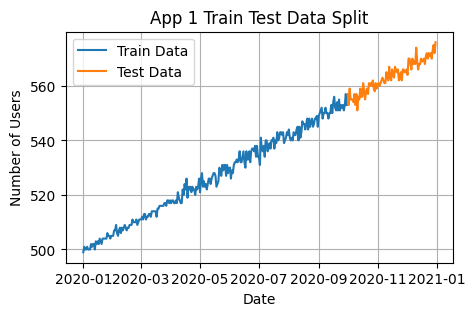

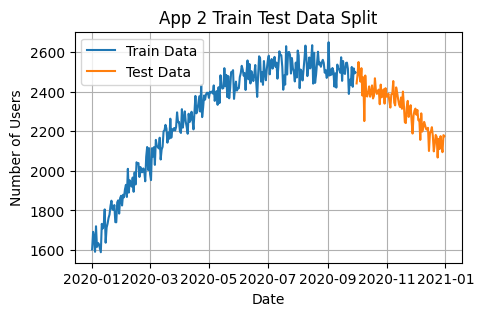

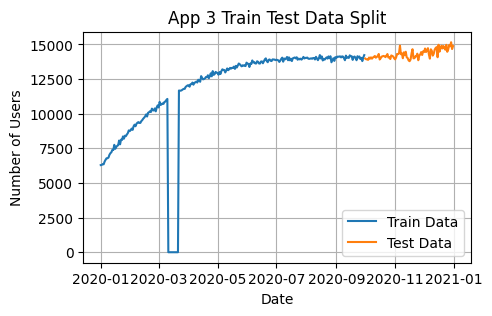

In [30]:
def visualize_train_test_data(train_data, test_data, title):
    plt.figure(figsize=(5, 3))

    plt.plot(train_data['date'], train_data['users'], label='Train Data')
    plt.plot(test_data['date'], test_data['users'], label='Test Data')

    plt.xlabel('Date')
    plt.ylabel('Number of Users')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

for i, (train_data, test_data) in enumerate(split_data):
    visualize_train_test_data(train_data, test_data, f'App {i+1} Train Test Data Split')